In [ ]:
import numpy as np

from IPython.display import HTML

from matplotlib.animation import FuncAnimation

import matplotlib.pyplot as plt
%matplotlib inline

# Questão 4: $(2,5 \; pontos)$

Apresente uma simulação como animação de uma roda rodando sobre uma superfície horizontal. A roda deve apresentar ao menos 2 aros ortogonais que passam pelo centro da roda.

* $0,5 \; pontos$ pela combinação da rotação com translação;
* $1,0 \; ponto$ para a rodar dar 1 volta completa na animação;
* $1,0 \; ponto$ se a roda não apresentar o efeito de derrapagem.

A animação deve ter de 5 à 10 segundos.

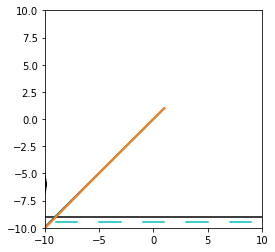

In [ ]:

figure, axis = plt.subplots()

axis.set_aspect('equal')  # x e y tem a mesma proporção
axis.set_xlim((-10, 10))
axis.set_ylim((-10, 10))

# Começa no ponto (10, -9) e tem 20 unidades de tamanho
# faz uma linha reta (180ª)

estrada_x = 10 + np.linspace(0, 20 * np.cos(np.radians(180)), 100)
estrada_y = -9 + np.linspace(0, 20 * np.sin(np.radians(180)), 100)

linha_estrada1 = [
        -7 + np.linspace(0, 2 * np.cos(np.radians(180)), 100),
        -9.5 + np.linspace(0, 2 * np.sin(np.radians(180)), 100)]

linha_estrada2 = [
        -3 + np.linspace(0, 2 * np.cos(np.radians(180)), 100),
        -9.5 + np.linspace(0, 2 * np.sin(np.radians(180)), 100)]

linha_estrada3 = [
        1 + np.linspace(0, 2 * np.cos(np.radians(180)), 100),
        -9.5 + np.linspace(0, 2 * np.sin(np.radians(180)), 100)]

linha_estrada4 = [
        5 + np.linspace(0, 2 * np.cos(np.radians(180)), 100),
        -9.5 + np.linspace(0, 2 * np.sin(np.radians(180)), 100)]

linha_estrada5 = [
        9 + np.linspace(0, 2 * np.cos(np.radians(180)), 100),
        -9.5 + np.linspace(0, 2 * np.sin(np.radians(180)), 100)]


t = np.linspace(0, 2 * np.pi, 100)

circulo_x = 3 * np.cos(t) + -13  # xc = -13  
circulo_y = 3 * np.sin(t) + -6    # yc = -6

circulo = np.vstack((
        circulo_x,
        circulo_y,
        np.ones((100,)))).T


aro1 = [
       -13 + np.linspace(0, 6 * np.cos(np.radians(90)), 100),
       -9 + np.linspace(0, 6 * np.sin(np.radians(90)), 100)]

aro2 = [
       -10 + np.linspace(0, 6 * np.cos(np.radians(180)), 100),
       -6 + np.linspace(0, 6 * np.sin(np.radians(180)), 100)]

# Empilhando o aro1 e aro2 para poderem ser manipulados
aro1 = np.vstack((
            aro1[0],
            aro1[1],
            np.ones((100,)))).T


aro2 = np.vstack((
            aro2[0],
            aro2[1],
            np.ones((100,)))).T


bolinha_roda_x = 0.5 * np.cos(t) + -13
bolinha_roda_y =  0.5 * np.sin(t) + -6

bolinha_roda = np.vstack((
        bolinha_roda_x,
        bolinha_roda_y,
        np.ones((100,)))).T


line_estrada, = axis.plot(estrada_x, estrada_y, 'k')

line_linha1, = axis.plot(linha_estrada1[0], linha_estrada1[1], 'c')
line_linha2, = axis.plot(linha_estrada2[0], linha_estrada2[1], 'c')
line_linha3, = axis.plot(linha_estrada3[0], linha_estrada3[1], 'c')
line_linha4, = axis.plot(linha_estrada4[0], linha_estrada4[1], 'c')
line_linha5, = axis.plot(linha_estrada5[0], linha_estrada5[1], 'c')

line_circulo, = axis.plot(circulo_x, circulo_y, 'k', lw=4, )  # circulo

line_aro1, = axis.plot(aro1[0], aro1[1], lw=2)  # lw=espessura
line_aro2, = axis.plot(aro2[0], aro2[1], lw=2)

line_bolinha_roda, = axis.plot(bolinha_roda_x, bolinha_roda_y, 'k', lw=4)


In [ ]:
# Funções da animação para a rotação dos aros

def rotaciona_aro1(angulo, aro):
    xcentro, ycentro, um = np.mean(aro[:-1], axis=0)

    ida_ao_centro = np.array([
                [1,   0,  0],
                [0,   1,  0],
                [-xcentro, -ycentro, um]])

    volta_ao_centro = np.array([
                [1,   0,  0],
                [0,   1,  0],
                [xcentro, ycentro, um]])

    rotacao = np.array([[np.cos(angulo),  np.sin(angulo), 0],
                        [-np.sin(angulo), np.cos(angulo), 0],
                        [0,               0,              1]]).T

    aro = np.matmul(aro, ida_ao_centro)
    aro = np.matmul(aro, rotacao)
    aro = np.matmul(aro, volta_ao_centro)

    return aro


def rotaciona_aro2(angulo, aro):
    xcentro, ycentro, um = np.mean(aro[:-1], axis=0)

    ida_ao_centro = np.array([
                [1,   0,  0],
                [0,   1,  0],
                [-xcentro, -ycentro, um]])

    volta_ao_centro = np.array([
                [1,   0,  0],
                [0,   1,  0],
                [xcentro, ycentro, um]])

    rotacao = np.array([[np.cos(angulo),  np.sin(angulo), 0],
                        [-np.sin(angulo), np.cos(angulo), 0],
                        [0,               0,              1]]).T

    aro = np.matmul(aro, ida_ao_centro)
    aro = np.matmul(aro, rotacao)
    aro = np.matmul(aro, volta_ao_centro)

    return aro   



In [ ]:
# Funções da animação para o deslocamento dos aros

def desloca_aro1(vetor_desloc, aro1):
    deslocamento = np.array([
                [1,            0, 0],
                [0,            1, 0],
                [vetor_desloc, 0, 1]])

    aro1 = np.matmul(aro1, deslocamento)

    return aro1


def desloca_aro2(vetor_desloc, aro2):
    deslocamento = np.array([
                [1,            0, 0],
                [0,            1, 0],
                [vetor_desloc, 0, 1]])

    aro2 = np.matmul(aro2, deslocamento)

    return aro2


In [ ]:
# Função da animação para o deslocamento do circulo (roda) e da bolinha da roda

def desloca_circulo(vetor_desloc, circulo):
    deslocamento = np.array([
                [1,            0, 0],
                [0,            1, 0],
                [vetor_desloc, 0, 1]])

    circulo = np.matmul(circulo, deslocamento)

    return circulo


def desloca_bolinha(vetor_desloc, bolinha):
    deslocamento = np.array([
                [1,            0, 0],
                [0,            1, 0],
                [vetor_desloc, 0, 1]])

    bolinha = np.matmul(bolinha, deslocamento)

    return bolinha


In [ ]:

# initialization function: plot the background of each frame
def init():
    x_aro1 = aro1[:,0]
    y_aro1 = aro1[:,1]

    x_aro2 = aro2[:,0]
    y_aro2 = aro2[:,1]

    x_circulo = circulo[0:,0]
    y_circulo = circulo[0:,1]

    line_aro1.set_data(x_aro1, y_aro1)
    line_aro2.set_data(x_aro2, y_aro2)
    line_circulo.set_data(x_circulo, y_circulo)

    line_aro1.set_color('brown')
    line_aro2.set_color('brown')
    line_circulo.set_color('black')
    line_bolinha_roda.set_color('black')

    return (line_aro1, line_aro2, line_circulo, line_bolinha_roda)


In [ ]:

# animation function. This is called sequentially
def animate(i):
    global aro1
    global aro2
    global circulo
    global bolinha_roda

    angulo_total = np.deg2rad(360)
    N_frames = 100
    
    angulo = angulo_total / (N_frames // 3)
    deslocamento_por_frame = 26 / N_frames

    aro1 = rotaciona_aro1(angulo, aro1)
    aro2 = rotaciona_aro2(angulo, aro2)

    aro1 = desloca_aro1(deslocamento_por_frame, aro1)
    aro2 = desloca_aro2(deslocamento_por_frame, aro2)

    circulo = desloca_circulo(deslocamento_por_frame, circulo)

    bolinha_roda = desloca_bolinha(deslocamento_por_frame, bolinha_roda)
        
    x_aro1 = aro1[:,0]
    y_aro1 = aro1[:,1]

    x_aro2 = aro2[:,0]
    y_aro2 = aro2[:,1]    

    x_circulo = circulo[0:,0]
    y_circulo = circulo[0:,1]

    x_bolinha_roda = bolinha_roda[:,0]
    y_bolinha_roda = bolinha_roda[:,1]


    line_aro1.set_data(x_aro1, y_aro1)
    line_aro2.set_data(x_aro2, y_aro2)
    line_circulo.set_data(x_circulo, y_circulo)
    line_bolinha_roda.set_data(x_bolinha_roda, y_bolinha_roda)

    return (line_aro1, line_aro2, line_circulo, line_bolinha_roda)


In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(figure, animate, init_func=init,
                     frames=100, interval=50, blit=True)

In [ ]:
HTML(anim.to_html5_video())